# **Assignment 2**
## **Convolutional Neural Networks (CNNS) for Image Classification**

In this assignment, we explore the capabilities of a popular deep learning architectures — Convolutional Neural Networks (CNNs) — by training them on various datasets and comparing their performance. While ANNs serve as a versatile model for a range of tasks, CNNs are specifically designed for handling spatial data, making them particularly effective for image classification problems. By evaluating these models, we aim to highlight their respective strengths, limitations, and suitability for different types of data, providing insights into their real-world applications.

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 1**
This block imports essential libraries needed for building and training a Convolutional Neural Network (CNN) with PyTorch, including data loading, transformations, and metrics for evaluation.
1) <blue>**torch**</blue>: The core PyTorch library, essential for all operations involving tensors, model creation, and training.
2) <blue>**torch.nn**</blue>: Contains modules to define neural network architectures.
3) <blue>**torch.optim**</blue>: Provides optimization algorithms like <green>**SGD (Stochastic Gradient Descent)**</green>, used during model training.
4) <blue>**torchvision.transforms**</blue>: A module for applying various image transformations, such as <green>**normalization**</green> or <green>**random cropping**</green>.
5) <blue>**DataLoader**</blue>: Used to efficiently load data in batches, critical for training deep learning models.
6) <blue>**sklearn.metrics**</blue>: Includes metrics to evaluate model performance, such as <green>**accuracy**</green> and <green>**precision**</green>.
7) <blue>**seaborn/matplotlib**</blue>: Libraries for <green>**visualization**</green>, typically used to visualize model performance metrics.


In [1]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 2**
This block configures the device (CPU or GPU) and applies data transformations to the images (conversion to tensors and normalization).
1) <blue>**torch.device**</blue>: Chooses the <green>**device**</green> to run computations on. If a <green>**GPU**</green> is available, the model will run on it; otherwise, it defaults to the CPU.
2) <blue>**transforms.Compose**</blue>: Combines multiple transformations to apply <green>**sequentially**</green> to the data.
3) <blue>**transforms.ToTensor()**</blue>: Converts the image from a <green>**PIL Image**</green> (or numpy array) to a PyTorch tensor.
4) <blue>**transforms.Normalize()**</blue>: Normalizes the pixel values of the image. Each <green>**channel (R, G, B)**</green> is normalized with a <blue>**mean**</blue> of <green>**0.5**</green> and a <blue>**standard deviation**</blue> of <green>**0.5**</green>, scaling the values to the range [-1, 1].

In [2]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the dataset
])

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 3**
This block is meant to load the CIFAR-10 dataset, though the actual dataset loading is marked as a TODO. It sets up data loaders for both the training and testing datasets.
1) <blue>**train_dataset/test_dataset**</blue>: These will eventually contain the training and testing datasets. The <blue>**torchvision.datasets.CIFAR10**</blue> class will likely be used here.
2) <blue>**train_loader**</blue>: Loads the training dataset in <blue>**batches**</blue> of <green>**64**</green> images and <green>**shuffles**</green> them to ensure randomness during training.
3) <blue>**test_loader**</blue>: Loads the test dataset in <blue>**batches**</blue> of <green>**64**</green> images but <green>**does not shuffle**</green> them since testing doesn't require randomization.

Note: Replace the placeholders **"None"** with the appropriate code to download the training and testing dataset.


In [3]:
# Load CIFAR-10 dataset
# TODO: Use torchvision.datasets.CIFAR10 to load the training and test sets
train_dataset = torchvision.datasets.CIFAR10(root='./data',         # Directory to store the dataset
        train=True,            # Specifies this is the training set
        download=True,         # Downloads the dataset if not already present
        transform=transform    # Apply the defined transformations
    )   # Replace None with code to load the training dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data',         # Directory to store the dataset
        train=False,            # Specifies this is the training set
        download=True,         # Downloads the dataset if not already present
        transform=transform    # Apply the defined transformations
    )   # Replace None with code to load the training dataset  # Replace None with code to load the test dataset

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 4**
1) This code defines a simple <green>**feedforward artificial neural network (ANN)**</green> for classification.
2) The model has three fully connected layers <blue>**(fc1, fc2, fc3)**</blue>, and the final layer outputs predictions for <green>**10 classes** </green>.
3) The <green>**forward pass**</green> describes how the input data flows through the network
4) The input image is first <green>**flattened**</green>.
5) It passes through fully connected layers with <blue>**ReLU activation function**</blue>.

Note: Replace the placeholders **"None"** with the appropriate numbers of units and activation functions in each layer.

In [4]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # TODO: Define the layers for the ANN (Flatten, Fully Connected, Activation functions)
        self.fc1 = nn.Linear(32*32*3, 512)  # Input layer (replace None with the number of units)
        self.fc2 = nn.Linear(512, 64)  # Hidden layer (replace None with the number of units)
        self.out = nn.Linear(64, 10)  # Output layer for 10 classes

    def forward(self, x):
        # TODO: Define forward pass
        x = x.view(-1, 32*32*3)  # Flatten the input image
        x = nn.functional.relu(self.fc1(x)) # First fully connected layer + relu activation
        x = nn.functional.relu(self.fc2(x))  # Second fully connected layer + relu activation
        x = self.out(x)   # Output layer
        return x


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 5**
1) The <blue>**ANN model**</blue> is instantiated and moved to the <green>**selected device (CPU or GPU)**</green>.
2) The loss function is set to <blue>**CrossEntropyLoss**</blue>, which is suitable for <green>**multi-class classification**</green> problems like in our case of CIFAR-10.
3) The optimizer is <blue>**Adam**</blue>, with a <blue>**learning rate**</blue> of <green>**0.001**</green>, used to adjust the model parameters during training based on gradients computed from the loss.

In [5]:
# Initialize the ANN model, loss function, and optimizer
model_ann = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ann.parameters(), lr=0.001)

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 6**
This code trains the neural network over a specified number of epochs (num_epochs).
For each batch of images and labels, the following steps are performed:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU or GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute the <green>**output predictions**</green>.
3) <blue>**Loss Calculation**</blue>: The loss between the predictions and true labels is computed and added to <blue>**ls_losses**</blue> for tracking.
4) <blue>**Backpropagation and Optimization**</blue>: Gradients are calculated using backpropagation, and the optimizer <green>**updates the model parameters**</green> based on these gradients.

Every 100 batches, the loss is printed to monitor training progress.

In [6]:
# Training loop
num_epochs = 5
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # TODO: Move images and labels to the device
        images = images.to(device).view(-1, 32*32*3)  # Replace None with the correct code
        labels = labels.to(device)  # Replace None with the correct code


        # TODO: Forward pass
        outputs = model_ann.forward(images)   # Replace None with forward pass through the model
        loss = criterion(outputs, labels) # Replace None with the correct code to find error between labels and outputs
        ls_losses.append(loss.detach().numpy())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/782], Loss: 1.7349
Epoch [1/5], Step [200/782], Loss: 1.6804
Epoch [1/5], Step [300/782], Loss: 1.4772
Epoch [1/5], Step [400/782], Loss: 1.5976
Epoch [1/5], Step [500/782], Loss: 1.7228
Epoch [1/5], Step [600/782], Loss: 1.6525
Epoch [1/5], Step [700/782], Loss: 1.4051
Epoch [2/5], Step [100/782], Loss: 1.4469
Epoch [2/5], Step [200/782], Loss: 1.4177
Epoch [2/5], Step [300/782], Loss: 1.6753
Epoch [2/5], Step [400/782], Loss: 1.3450
Epoch [2/5], Step [500/782], Loss: 1.7114
Epoch [2/5], Step [600/782], Loss: 1.3839
Epoch [2/5], Step [700/782], Loss: 1.4583
Epoch [3/5], Step [100/782], Loss: 1.5441
Epoch [3/5], Step [200/782], Loss: 1.2832
Epoch [3/5], Step [300/782], Loss: 1.4399
Epoch [3/5], Step [400/782], Loss: 1.4873
Epoch [3/5], Step [500/782], Loss: 1.2038
Epoch [3/5], Step [600/782], Loss: 1.5143
Epoch [3/5], Step [700/782], Loss: 1.3664
Epoch [4/5], Step [100/782], Loss: 1.3225
Epoch [4/5], Step [200/782], Loss: 1.1051
Epoch [4/5], Step [300/782], Loss:

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 7**
1) This code plots the <blue>**training losses**</blue> that were recorded in <blue>**ls_losses**</blue> during training.
2) The <blue>**x-axis**</blue> represents the <green>**number of samples (batches)**</green> seen during training, and the <blue>**y-axis**</blue> shows the <green>**corresponding loss**</green>.
3) It provides a visual representation of how the <green>**model's loss decreases over time**</green>, indicating whether the training is progressing well.

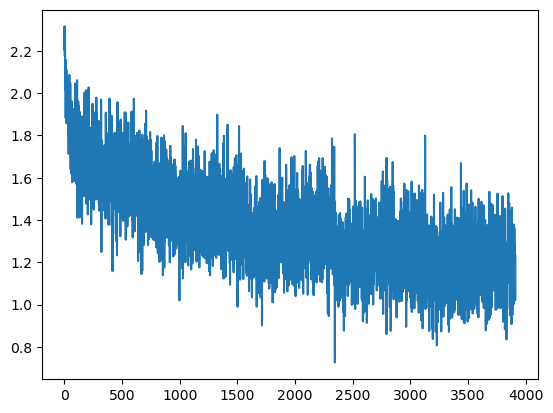

In [7]:
# Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel = "Sample"
plt.ylabel = "Loss"

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 8**
This block evaluates the model on the test dataset.\
<blue>**model.eval()**</blue> sets the model to <green>**evaluation mode**</green>, disabling dropout layers and stopping the computation of gradients to save memory and speed up computations.
For each batch of test images:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU/GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute <green>**predictions**</green>.
3) <blue>**Storing Results**</blue>: Predictions and true labels are saved to <green>**calculate metrics**</green> later.

This code also calculates key performance metrics to evaluate the model:
1) <blue>**Accuracy**</blue>: Percentage of correctly classified samples.
2) <blue>**Precision**</blue>: Proportion of true positive predictions out of all positive predictions.
3) <blue>**Recall**</blue>: Proportion of true positives out of actual positive samples.
4) <blue>**F1-Score**</blue>: <green>**Harmonic mean**</green> of precision and recall.
5) The <blue>**confusion matrix**</blue> is also calculated, showing the number of correct and incorrect predictions for each class. It is visualized using a <green>**heatmap**</green>, where the <blue>**rows**</blue> represent <green>**true labels**</green>, and the <blue>**columns**</blue> represent <green>**predicted labels**</green>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [8]:
# Test the model
model_ann.eval()
all_preds_ann = []
all_labels_ann = []

with torch.no_grad():
    for images, labels in test_loader:
        # TODO: Move images and labels to the device
        images = images.to(device).view(-1, 32*32*3)  # Replace None with the correct code
        labels = labels.to(device)

        # TODO: Forward pass
        outputs = model_ann.forward(images) # Replace None with the forward pass

        _, predicted = torch.max(outputs.data, 1)
        all_preds_ann.extend(predicted.cpu().numpy())
        all_labels_ann.extend(labels.cpu().numpy())

all_preds = np.array(all_preds_ann) # Replace None with correct code to convert to numpy array
all_labels = np.array(all_labels_ann)  # Replace None with correct code to convert to numpy array

# TODO: Calculate accuracy, precision, recall, and F1-score using sklearn
accuracy_ann = accuracy_score(all_preds_ann,all_labels_ann)  # Replace None with the correct calculation
precision_ann = precision_score(all_preds,all_labels,average='macro')
recall_ann = recall_score(all_preds,all_labels,average='macro')
f1_ann = f1_score(all_preds,all_labels,average='macro')

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(f"ANN Precision: {precision_ann:.4f}")
print(f"ANN Recall: {recall_ann:.4f}")
print(f"ANN F1-Score: {f1_ann:.4f}")


ANN Accuracy: 0.5188
ANN Precision: 0.5188
ANN Recall: 0.5225
ANN F1-Score: 0.5141


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 9**
This block defines a simple Convolutional Neural Network (CNN) architecture using PyTorch. The model will consist of convolutional layers, activation functions, pooling layers, and fully connected layers to classify images from the CIFAR-10 dataset.
1) <blue>**class CNN(nn.Module)**</blue>: This defines a custom CNN class that inherits from PyTorch's nn.Module, the base class for all neural networks in PyTorch.
2) <blue>**self.conv**</blue>: These define the two convolutional layers. The first takes an <blue>**input**</blue> with <green>**3 channels (RGB)**</green> and produces <green>**32**</green> <blue>**feature maps**</blue>. The second takes <green>**32**</green> <blue>**input channels**</blue> and produces <green>**64**</green> <blue>**feature maps**</blue>.
3) <blue>**self.pool**</blue>: A max-pooling layer that reduces the size of the feature maps by <green>**half (downsampling)**</green>. It takes the maximum value over a <green>**2x2**</green> <blue>**grid**</blue> with a <blue>**stride**</blue> of <green>**2**</green>.
4) <blue>**self.fc**</blue>: Fully connected layers. The first layer takes the flattened feature maps from the convolutional layers as input and <blue>**outputs**</blue> <green>**512**</green> features. The second layer maps the <green>**512**</green> <blue>**features**</blue> to <green>**10**</green> <blue>**output classes**</blue> (for the 10 CIFAR-10 categories).
5) <blue>**forward(self, x)**</blue>: This function defines how data flows through the network. It applies the convolutional layers, pooling, and fully connected layers in sequence.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # TODO: Define the CNN layers (Conv2D, MaxPool, Fully Connected)
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # Replace None with the correct number of filters
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # Replace None
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  # Replace None
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))  # First conv layer + relu activation + pool
        x = self.pool(nn.functional.relu(self.conv2(x)))  # Second conv layer + relu activation + pool
        x = x.view(x.size(0), -1)   # Flatten the tensor (replace None with correct dimension)
        x = nn.functional.relu(self.fc1(x)) # Fully connected layer + relu activation
        x = self.fc2(x) # Output layer
        return x


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 10**
This block defines the training loop for the CNN model. It will train the model over multiple epochs, compute the loss using cross-entropy, and optimize the model using an optimizer like SGD.
1) <blue>**optimizer.zero_grad()**</blue>: <green>**Clears**</green> the <blue>**gradients**</blue> from the previous iteration to prevent accumulation.
2) <blue>**loss.backward()**</blue>: Computes the <blue>**gradients**</blue> via <green>**backpropagation**</green>.
3) <blue>**optimizer.step()**</blue>: Updates the model's parameters based on the <green>**computed gradients**</green>.
4) <blue>**running_loss**</blue>: Keeps track of the <blue>**cumulative loss**</blue> for the epoch, which is divided by the <green>**number of batches**</green> to return the <blue>**average loss**</blue>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [10]:
# Initialize the CNN model, loss function, and optimizer
model_cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_cnn.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # TODO: Move images and labels to the device
        images = images.to(device)
          # Replace None
        labels = labels.to(device)

        # TODO: Forward pass
        outputs = model_cnn.forward(images) # Replace None with forward pass through the CNN
        loss = criterion(outputs, labels) # Replace None with the correct code to find error between labels and outputs

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/782], Loss: 2.3009
Epoch [1/5], Step [200/782], Loss: 2.3090
Epoch [1/5], Step [300/782], Loss: 2.2979
Epoch [1/5], Step [400/782], Loss: 2.2949
Epoch [1/5], Step [500/782], Loss: 2.2892
Epoch [1/5], Step [600/782], Loss: 2.2978
Epoch [1/5], Step [700/782], Loss: 2.2941
Epoch [2/5], Step [100/782], Loss: 2.2871
Epoch [2/5], Step [200/782], Loss: 2.2852
Epoch [2/5], Step [300/782], Loss: 2.2878
Epoch [2/5], Step [400/782], Loss: 2.2834
Epoch [2/5], Step [500/782], Loss: 2.2886
Epoch [2/5], Step [600/782], Loss: 2.2887
Epoch [2/5], Step [700/782], Loss: 2.2764
Epoch [3/5], Step [100/782], Loss: 2.2671
Epoch [3/5], Step [200/782], Loss: 2.2511
Epoch [3/5], Step [300/782], Loss: 2.2654
Epoch [3/5], Step [400/782], Loss: 2.2632
Epoch [3/5], Step [500/782], Loss: 2.2620
Epoch [3/5], Step [600/782], Loss: 2.2624
Epoch [3/5], Step [700/782], Loss: 2.2564
Epoch [4/5], Step [100/782], Loss: 2.2235
Epoch [4/5], Step [200/782], Loss: 2.2210
Epoch [4/5], Step [300/782], Loss:

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 11**
This code performs evaluation on the test set by moving data to the appropriate device, running the model to get predictions, and then calculating key performance metrics using the predicted and actual labels.
1) <blue>**model_cnn.eval()**</blue>: The code begins by setting the model to <green>**evaluation mode**</green> to ensure proper inference behavior.
2) <blue>**all_preds_cnn, all_labels_cnn**</blue>: These lists are initialized to store <green>**predicted**</green> and <green>**true labels**</green>, respectively.
3) <blue>**torch.no_grad()**</blue>: This is used to <green>**disable gradients**</green>, save memory and speed up computations, the test set is processed in batches from test_loader, where both images and labels are moved to the correct device.
6) After processing the test set, evaluation metrics such as <blue>**accuracy**</blue>, <blue>**precision**</blue>, <blue>**recall**</blue>, and <blue>**F1-score**</blue> are calculated.
7) Finally, the results are printed to display the performance of the CNN model

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [11]:
# Test the CNN model
model_cnn.eval()
all_preds_cnn = []
all_labels_cnn = []

with torch.no_grad():
    for images, labels in test_loader:
        # TODO: Move images and labels to the device
        images = images.to(device)  # Replace None
        labels = labels.to(device)

        outputs = model_cnn.forward(images)  # Replace None with forward pass through the CNN
        _, predicted = torch.max(outputs.data, 1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())

# TODO: Calculate accuracy, precision, recall, and F1-score for the CNN
accuracy_cnn = accuracy_score(np.array(all_preds_cnn),np.array(all_labels_cnn))  # Replace None with the correct calculation
precision_cnn = precision_score(np.array(all_preds_cnn),np.array(all_labels_cnn),average='macro')
recall_cnn = recall_score(np.array(all_preds_cnn),np.array(all_labels_cnn),average='macro')
f1_cnn = f1_score(np.array(all_preds_cnn),np.array(all_labels_cnn),average='macro')

print(f"CNN Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Precision: {precision_cnn:.4f}")
print(f"CNN Recall: {recall_cnn:.4f}")
print(f"CNN F1-Score: {f1_cnn:.4f}")


CNN Accuracy: 0.2688
CNN Precision: 0.2688
CNN Recall: 0.2816
CNN F1-Score: 0.2336


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 12**
This code block compares performance of the trained ANN and CNN models, showing which one performs better.
1) <blue>**import pandas as pd**</blue>: The code starts by importing the <green>**Pandas library**</green>, which is used for data manipulation and creation of a comparison table.
2) <blue>**data dictionary**</blue>: A dictionary is defined with the keys 'Model', 'Accuracy', 'Precision', 'Recall', and 'F1-Score', containing <green>**placeholders (None)**</green> for both the 'ANN' and 'CNN' models. These placeholders will later hold the actual performance metrics.
3) <blue>**pd.DataFrame(data)**</blue>: The dictionary is converted into a <green>**Pandas DataFrame**</green>, which provides a tabular structure for easy comparison of the metrics between the two models.
4) <blue>**print(df_comparison)**</blue>: This line prints the <green>**comparison table**</green> of ANN and CNN metrics, enabling a visual representation of their performance.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [12]:
import pandas as pd

# TODO: Create a comparison table
data = {
    'Model': ['ANN', 'CNN'],
    'Accuracy': [accuracy_ann, accuracy_cnn],  # Replace None with the accuracy of ANN and CNN
    'Precision': [precision_ann, precision_cnn],
    'Recall': [recall_ann, recall_cnn],
    'F1-Score': [f1_ann, f1_cnn]
}

df_comparison = pd.DataFrame(data)
print(df_comparison)

  Model  Accuracy  Precision    Recall  F1-Score
0   ANN    0.5188     0.5188  0.522528  0.514101
1   CNN    0.2688     0.2688  0.281592  0.233611


### Advanced Steps (Optional for people targeting basic level)

### **Step - 13 (Understanding CNN Filters)**
This step aims to provide insight into what the convolutional filters in the CNN model have learned. By visualizing the weights of the filters in the first convolutional layer, we can get a sense of the basic features (like edges, corners, or textures) that the network is detecting in the images.

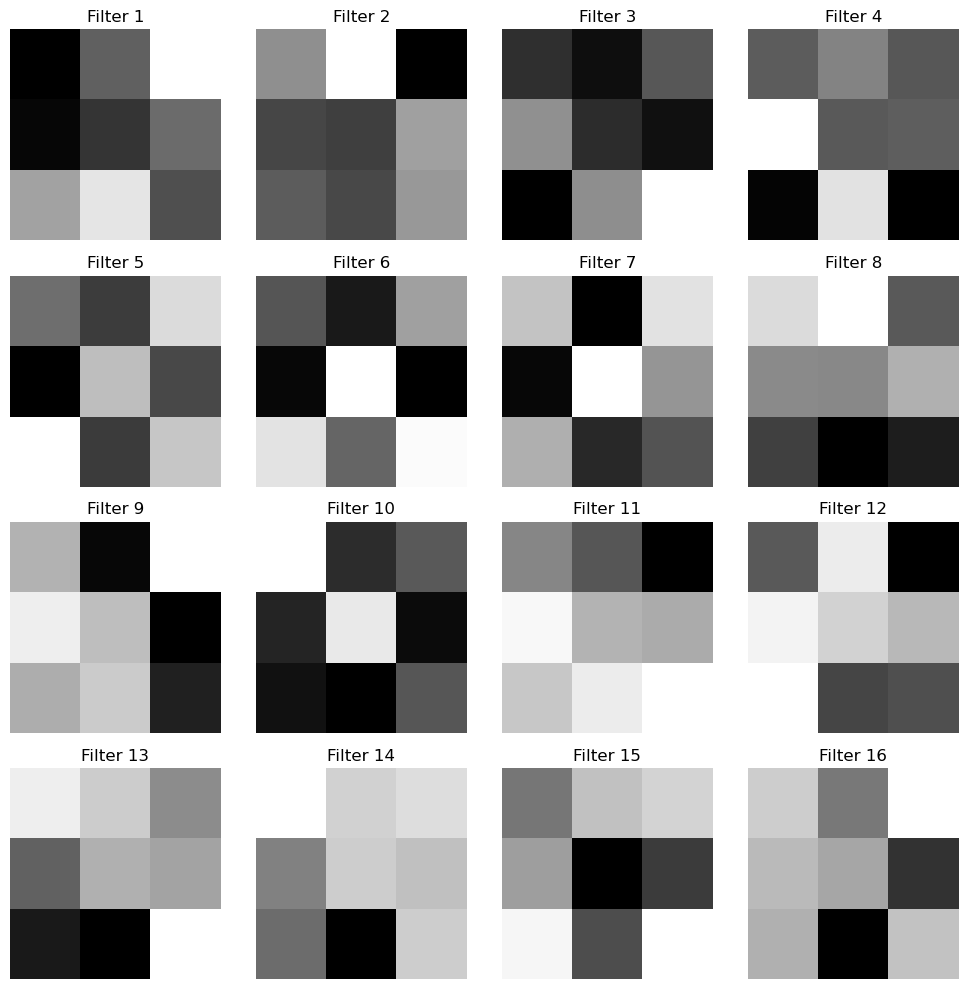

In [13]:
# Visualize filters from the first convolutional layer of the CNN model

# TODO: Get the weights of the first convolutional layer
first_conv_layer_weights = model_cnn.conv1.weight.data.cpu().numpy()  # Replace None with code to extract layer weights (e.g., model_cnn.conv1.weight.data.cpu().numpy())

# TODO: Normalize the weights for visualization
# Normalizing helps bring all filter values to a common scale between 0 and 1
min_w = first_conv_layer_weights.min()  # Replace None with code to find the minimum value in the weights
max_w = first_conv_layer_weights.max() # Replace None with code to find the maximum value in the weights
first_conv_layer_weights = (first_conv_layer_weights - min_w) / (max_w - min_w)  # Replace None with normalization formula

# TODO: Plot the filters
# We’ll display up to 16 filters for clarity
num_filters = first_conv_layer_weights.shape[0]  # Replace None with the total number of filters in the first layer
num_plots = min(num_filters, 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axes = axes.flatten()

for i in range(num_plots):
    # TODO: Select one filter to visualize
    filter_img = first_conv_layer_weights[i, 0, :, :]  # Replace None with correct slice from first_conv_layer_weights
    axes[i].imshow(filter_img, cmap='gray')
    axes[i].set_title(f'Filter {i+1}')
    axes[i].axis('off')

# Hide unused subplots
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### **Step - 14 (Data Augmentation)**
Data augmentation is a technique used to increase the diversity of the training dataset by applying random transformations such as rotations, flips, and crops to the images. This helps to prevent overfitting and can improve the generalization ability of the model. We will apply data augmentation to the training data and retrain the CNN model to see if it improves performance.

In [15]:
# Define data augmentation transformations
train_transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset with data augmentation
train_dataset_augmented = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                      download=True, transform=train_transform_augmented)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform) # Use the original transform for testing

train_loader_augmented = DataLoader(dataset=train_dataset_augmented, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# TODO: Initialize CNN model, loss function, and optimizer
model_cnn_augmented = CNN().to(device) # Replace None with model initialization (e.g., CNN().to(device))
criterion = nn.CrossEntropyLoss()  # Replace None with loss function (e.g., nn.CrossEntropyLoss())
optimizer_augmented = optim.Adam(model_cnn_augmented.parameters(), lr=0.001)  # Replace None with optimizer (e.g., optim.Adam(...))

print("Training CNN with Data Augmentation...")

# TODO: Train the CNN model
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader_augmented):

        # Move images and labels to the device
        images = images.to(device) # Replace None with code to move images to device
        labels = labels.to(device)  # Replace None with code to move labels to device

        # Forward pass
        outputs = model_cnn_augmented(images)  # Replace None with model forward pass
        loss = criterion(outputs, labels) # Replace None with loss computation

        # Backward pass and optimization
        optimizer_augmented.zero_grad()
        loss.backward()
        optimizer_augmented.step()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader_augmented)}], Loss: {loss.item():.4f}")

Training CNN with Data Augmentation...
Epoch [1/5], Step [100/782], Loss: 1.8956
Epoch [1/5], Step [200/782], Loss: 1.6833
Epoch [1/5], Step [300/782], Loss: 1.6989
Epoch [1/5], Step [400/782], Loss: 1.6465
Epoch [1/5], Step [500/782], Loss: 1.4015
Epoch [1/5], Step [600/782], Loss: 1.3639
Epoch [1/5], Step [700/782], Loss: 1.3057
Epoch [2/5], Step [100/782], Loss: 1.2443
Epoch [2/5], Step [200/782], Loss: 1.3493
Epoch [2/5], Step [300/782], Loss: 1.3466
Epoch [2/5], Step [400/782], Loss: 1.3343
Epoch [2/5], Step [500/782], Loss: 1.4906
Epoch [2/5], Step [600/782], Loss: 1.3898
Epoch [2/5], Step [700/782], Loss: 1.4074
Epoch [3/5], Step [100/782], Loss: 1.2663
Epoch [3/5], Step [200/782], Loss: 1.2151
Epoch [3/5], Step [300/782], Loss: 1.4654
Epoch [3/5], Step [400/782], Loss: 1.2895
Epoch [3/5], Step [500/782], Loss: 1.0822
Epoch [3/5], Step [600/782], Loss: 1.4314
Epoch [3/5], Step [700/782], Loss: 1.2445
Epoch [4/5], Step [100/782], Loss: 1.0491
Epoch [4/5], Step [200/782], Loss: 1.

### **Step - 15 (Visualize Incorrect Predictions)**
Visualizing some of the images that the CNN model misclassified can provide valuable insights into the model's weaknesses and help identify areas for improvement. This step will display a few examples of images where the model's predicted label does not match the true label.

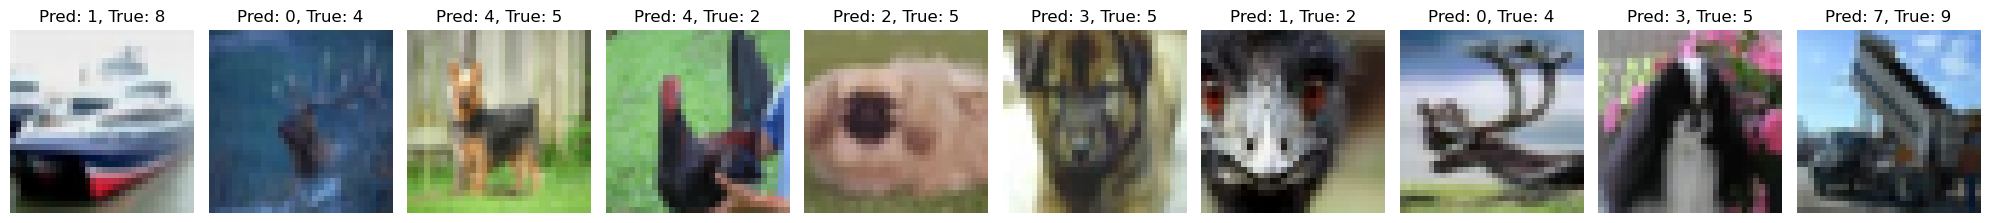

In [17]:
# Visualize some incorrect predictions from the CNN model (using the augmented model if trained)
# TODO: Choose which model to evaluate (use augmented model if available)
model_to_evaluate = model_cnn_augmented if 'model_cnn_augmented' in locals() else model_cnn # Replace None with conditional model selection
model_to_evaluate.eval()


incorrect_preds = []
incorrect_labels = []
incorrect_images = []

# TODO: Run the model on the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        images_cpu = images.cpu()   # Replace None with a CPU copy of images for visualization
        images = images.to(device)  # Replace None with code to move images to device
        labels = labels.to(device)  # Replace None with code to move labels to device

        # Forward pass
        outputs = model_to_evaluate(images)  # Replace None with model forward pass
        _, predicted = torch.max(outputs.data, 1)  # Replace None with code to get class predictions using torch.max()

        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                incorrect_preds.append(predicted[i].item())
                incorrect_labels.append(labels[i].item())
                # Denormalize the image before storing
                img = images_cpu[i].numpy().transpose((1, 2, 0))
                img = 0.5 * img + 0.5 # Denormalize
                img = np.clip(img, 0, 1)
                incorrect_images.append(img)

# Display up to 10 incorrect predictions, add more visualisations if possible
num_to_display = min(len(incorrect_images), 10)
fig, axes = plt.subplots(nrows=1, ncols=num_to_display, figsize=(20, 4))

if num_to_display > 0:
    for i in range(num_to_display):
        axes[i].imshow(incorrect_images[i])
        axes[i].set_title(f'Pred: {incorrect_preds[i]}, True: {incorrect_labels[i]}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No incorrect predictions to display.")